<table width="100%" style="border: none;">
  <tr>
    <td align="left" style="border: none;"><b>LE GOURRIEREC Titouan</b></td>
    <td align="right" style="border: none;">
      <a href="https://www.linkedin.com/in/titouanlegourrierec"><img src="https://img.shields.io/badge/linkedin-%230077B5.svg?style=for-the-badge&logo=linkedin&logoColor=white" alt="LinkedIn"></a>
      <a href="mailto:titouanlegourrierec@icloud.com"><img src="https://img.shields.io/badge/email-%23339933.svg?style=for-the-badge&logo=mail.ru&logoColor=white" alt="Mail"></a>
      <a href="https://titouanlegourrierec.github.io"><img src="https://img.shields.io/badge/website-%23323330.svg?style=for-the-badge&logo=About.me&logoColor=white" alt="Website"></a>
    </td>
  </tr>
</table>

<h1 style="clear:both; text-align:center;">EasIlastik</h1>
<h3 style="clear:both; text-align:center;">A package to facilitate the use of a pretrained model on Ilastik.</h3>

## Table of Contents
1. [Introduction](#1.-introduction)
2. [Segment images](#2.-segment-images)
   - [Segment a single image](#Segment-a-single-image)
   - [Segment a folder of images](#Segment-a-folder-of-images)
3. [Visualize prediction uncertainties](#3.-Visualize-prediction-uncertainties)
4. [Run Ilastik by thresholding uncertainty.](#4.-Run-Ilastik-by-thresholding-uncertainty.)

---

In [1]:
# import the necessary packages
from EasIlastik.run_ilastik import run_ilastik
from EasIlastik.run_ilastik import run_ilastik_probabilities
from EasIlastik.run_ilastik import color_treshold_probabilities

import matplotlib.pyplot as plt
import cv2
import os

---
## 1. Introduction
This example notebook aims to explain the various possible uses of a pretrained model on Ilastik in Python with this package.

Before starting, make sure you have completed all [the necessary steps](https://github.com/titouanlegourrierec/EasIlastik/wiki/Train-a-model-on-Ilastik) for using the pretrained model. If you encounter any issues, please refer to the package [documentation](https://github.com/titouanlegourrierec/EasIlastik/wiki) for assistance.

Feel free to [contact me](mailto:titouanlegourrierec@icloud.com) in case of any bugs 🐞, for clarification 📖, or to suggest improvements 🛠️.

---

## 2. Segment images
Once your model is pre-trained on Ilastik according to the segmentation problem you want to address, you can simply use it to segment new images as explained below.

### Segment a single image

In [2]:
# define the path to the input image to be segmented
input_path = "./images/test/2.jpg"

# define the path to the ilastik project file you want to use
project_path = "model.ilp"

# define the path to the folder where the results should be saved
result_base_path = "./model_results/"

# define the name of the export source, here "Simple Segmentation" will segment the image basically
export_source = "Simple Segmentation"

# define the output format of the result image,
output_format = "png"

# run the ilastik project on the input image and save the result in the result_base_path folder
run_ilastik(input_path = input_path,
            project_path = project_path,
            result_base_path = result_base_path,
            export_source = export_source,
            output_format = output_format)

INFO ilastik.app: Using tiktorch executable: ['/Applications/ilastik-1.4.1b15-arm64-OSX.app/Contents/ilastik-release/bin/python', '-m', 'tiktorch.server']
INFO ilastik.app: config file location: <none>
INFO ilastik.app: Starting ilastik from "/Applications/ilastik-1.4.1b15-arm64-OSX.app/Contents/ilastik-release/lib/python3.9".
Starting ilastik from "/Applications/ilastik-1.4.1b15-arm64-OSX.app/Contents/ilastik-release/lib/python3.9".


WARNING 2024-04-23 22:21:11,424 opConservationTracking 47331 8211348160 Could not find any ILP solver
WARNING 2024-04-23 22:21:11,433 opStructuredTracking 47331 8211348160 Could not find any ILP solver
WARNING 2024-04-23 22:21:11,436 structuredTrackingWorkflow 47331 8211348160 Could not find any learning solver. Tracking will use flow-based solver (DPCT). Learning for tracking will be disabled!


INFO ilastik.shell.projectManager: Opening Project: model.ilp
INFO ilastik.workflows.pixelClassification.pixelClassificationWorkflow: Beginning Batch Processing
INFO ilastik.applets.dataSelection.dataSelectionApplet: Using axistags from previous lane: [y x c, None]
INFO ilastik.applets.batchProcessing.batchProcessingApplet: Exporting to /Users/titouanlegourrierec/Desktop/Github/EasIlastik/Examples/model_results/2_Simple_Segmentation.png
INFO lazyflow.utility.bigRequestStreamer: Estimated RAM usage per pixel is 224.0B * safety factor (2.0)
INFO lazyflow.utility.bigRequestStreamer: determining blockshape assuming available_ram is 9.8GiB, split between 8 threads
INFO lazyflow.utility.bigRequestStreamer: Chose blockshape: (1227, 881, 4)
INFO lazyflow.utility.bigRequestStreamer: Estimated RAM usage per block is 461.8MiB
DEBUG lazyflow.operators.classifierOperators: Features took 0.157778 seconds. Prediction took 1.365573 seconds. Subregion: start '[0, 0, 0]' stop '[1227, 881, 4]'
INFO ilast

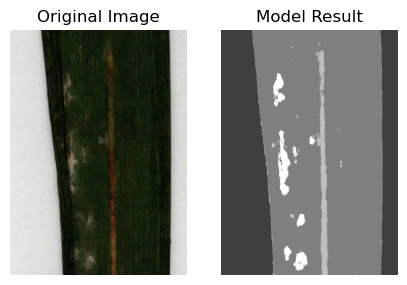

In [3]:
# display the original image and the model result
img = cv2.imread("./images/test/2.jpg")
model_result = cv2.imread("./model_results/2_Simple_Segmentation.png")

plt.figure(figsize=(5, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(model_result, cv2.COLOR_BGR2RGB))
plt.title("Model Result")
plt.axis("off")

plt.show()

### Segment a folder of images

In [4]:
# define the path to the input folder containing the images to be segmented
input_path = "./images/test"

# define the path to the ilastik project file you want to use
project_path = "model.ilp"

# define the path to the folder where the results should be saved
result_base_path = "./model_results/"

# define the name of the export source, here "Simple Segmentation" will segment the image basically
export_source = "Simple Segmentation"

# define the output format of the result image,
output_format = "png"

# run the ilastik project on the input images and save the results in the result_base_path folder
run_ilastik(input_path = input_path,
            project_path = project_path,
            result_base_path = result_base_path,
            export_source = export_source,
            output_format = output_format)

INFO ilastik.app: Using tiktorch executable: ['/Applications/ilastik-1.4.1b15-arm64-OSX.app/Contents/ilastik-release/bin/python', '-m', 'tiktorch.server']
INFO ilastik.app: config file location: <none>
INFO ilastik.app: Starting ilastik from "/Applications/ilastik-1.4.1b15-arm64-OSX.app/Contents/ilastik-release/lib/python3.9".
Starting ilastik from "/Applications/ilastik-1.4.1b15-arm64-OSX.app/Contents/ilastik-release/lib/python3.9".


WARNING 2024-04-23 22:21:16,370 opConservationTracking 47338 8211348160 Could not find any ILP solver
WARNING 2024-04-23 22:21:16,376 opStructuredTracking 47338 8211348160 Could not find any ILP solver
WARNING 2024-04-23 22:21:16,378 structuredTrackingWorkflow 47338 8211348160 Could not find any learning solver. Tracking will use flow-based solver (DPCT). Learning for tracking will be disabled!


INFO ilastik.shell.projectManager: Opening Project: model.ilp
INFO ilastik.workflows.pixelClassification.pixelClassificationWorkflow: Beginning Batch Processing
INFO ilastik.applets.dataSelection.dataSelectionApplet: Using axistags from previous lane: [y x c, None]
INFO ilastik.applets.batchProcessing.batchProcessingApplet: Exporting to /Users/titouanlegourrierec/Desktop/Github/EasIlastik/Examples/model_results/4_Simple_Segmentation.png
INFO lazyflow.utility.bigRequestStreamer: Estimated RAM usage per pixel is 224.0B * safety factor (2.0)
INFO lazyflow.utility.bigRequestStreamer: determining blockshape assuming available_ram is 9.7GiB, split between 8 threads
INFO lazyflow.utility.bigRequestStreamer: Chose blockshape: (1049, 868, 4)
INFO lazyflow.utility.bigRequestStreamer: Estimated RAM usage per block is 389.0MiB
DEBUG lazyflow.operators.classifierOperators: Features took 0.127209 seconds. Prediction took 1.058945 seconds. Subregion: start '[0, 0, 0]' stop '[1049, 868, 4]'
INFO ilast

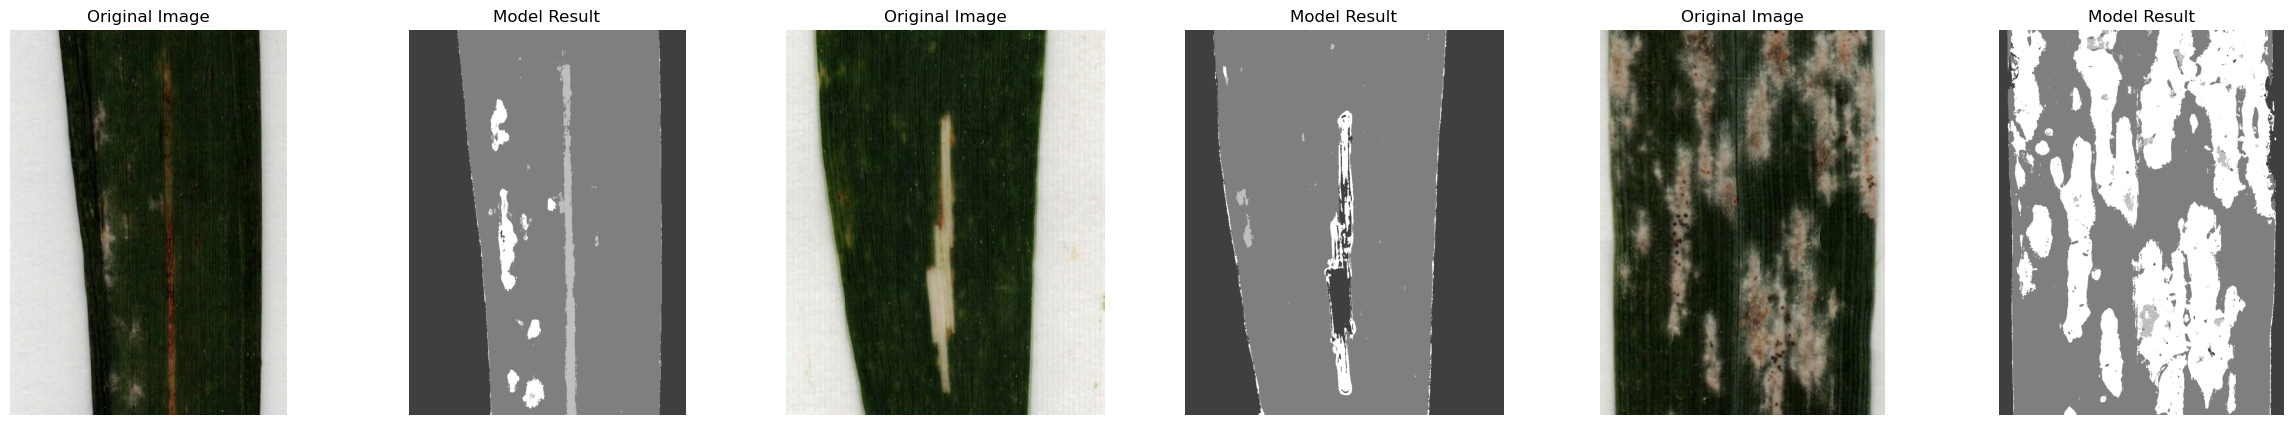

In [5]:
# display the original images and the model results
test_images = os.listdir("./images/test/")
model_results = os.listdir("./model_results/")

test_images.sort()
model_results.sort()

total_images = len(test_images)

fig, axs = plt.subplots(1, total_images*2, figsize=(total_images*10, 5))

for i, (test_image, model_result) in enumerate(zip(test_images, model_results)):
    img = cv2.imread(f"./images/test/{test_image}")
    model_img = cv2.imread(f"./model_results/{model_result}")

    axs[2*i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axs[2*i].set_title("Original Image")
    axs[2*i].axis("off")

    axs[2*i+1].imshow(cv2.cvtColor(model_img, cv2.COLOR_BGR2RGB))
    axs[2*i+1].set_title("Model Result")
    axs[2*i+1].axis("off")

plt.show()

---

## 3. Visualize prediction uncertainties
This section allows you to visualize the prediction uncertainties of the pretrained model. You can choose the RGB color for each class (note that the order of colors in `channel_colors` must match the order of annotation in Ilastik), as well as the color for uncertain pixels using `below_threshold_color`.

INFO ilastik.app: Using tiktorch executable: ['/Applications/ilastik-1.4.1b15-arm64-OSX.app/Contents/ilastik-release/bin/python', '-m', 'tiktorch.server']
INFO ilastik.app: config file location: <none>
INFO ilastik.app: Starting ilastik from "/Applications/ilastik-1.4.1b15-arm64-OSX.app/Contents/ilastik-release/lib/python3.9".
Starting ilastik from "/Applications/ilastik-1.4.1b15-arm64-OSX.app/Contents/ilastik-release/lib/python3.9".


WARNING 2024-04-23 22:21:24,633 opConservationTracking 47352 8211348160 Could not find any ILP solver
WARNING 2024-04-23 22:21:24,639 opStructuredTracking 47352 8211348160 Could not find any ILP solver
WARNING 2024-04-23 22:21:24,642 structuredTrackingWorkflow 47352 8211348160 Could not find any learning solver. Tracking will use flow-based solver (DPCT). Learning for tracking will be disabled!


INFO ilastik.shell.projectManager: Opening Project: model.ilp
INFO ilastik.workflows.pixelClassification.pixelClassificationWorkflow: Beginning Batch Processing
INFO ilastik.applets.dataSelection.dataSelectionApplet: Using axistags from previous lane: [y x c, None]
INFO ilastik.applets.batchProcessing.batchProcessingApplet: Exporting to /Users/titouanlegourrierec/Desktop/Github/EasIlastik/Examples/model_result_h5/2_Probabilities.h5/exported_data
INFO lazyflow.operators.ioOperators.ioOperators.OpH5N5WriterBigDataset: Data shape: (1227, 881, 4)
INFO lazyflow.utility.bigRequestStreamer: Estimated RAM usage per pixel is 224.0B * safety factor (2.0)
INFO lazyflow.utility.bigRequestStreamer: determining blockshape assuming available_ram is 9.6GiB, split between 8 threads
INFO lazyflow.utility.bigRequestStreamer: Chose blockshape: (1227, 881, 4)
INFO lazyflow.utility.bigRequestStreamer: Estimated RAM usage per block is 461.8MiB
DEBUG lazyflow.operators.classifierOperators: Features took 0.126

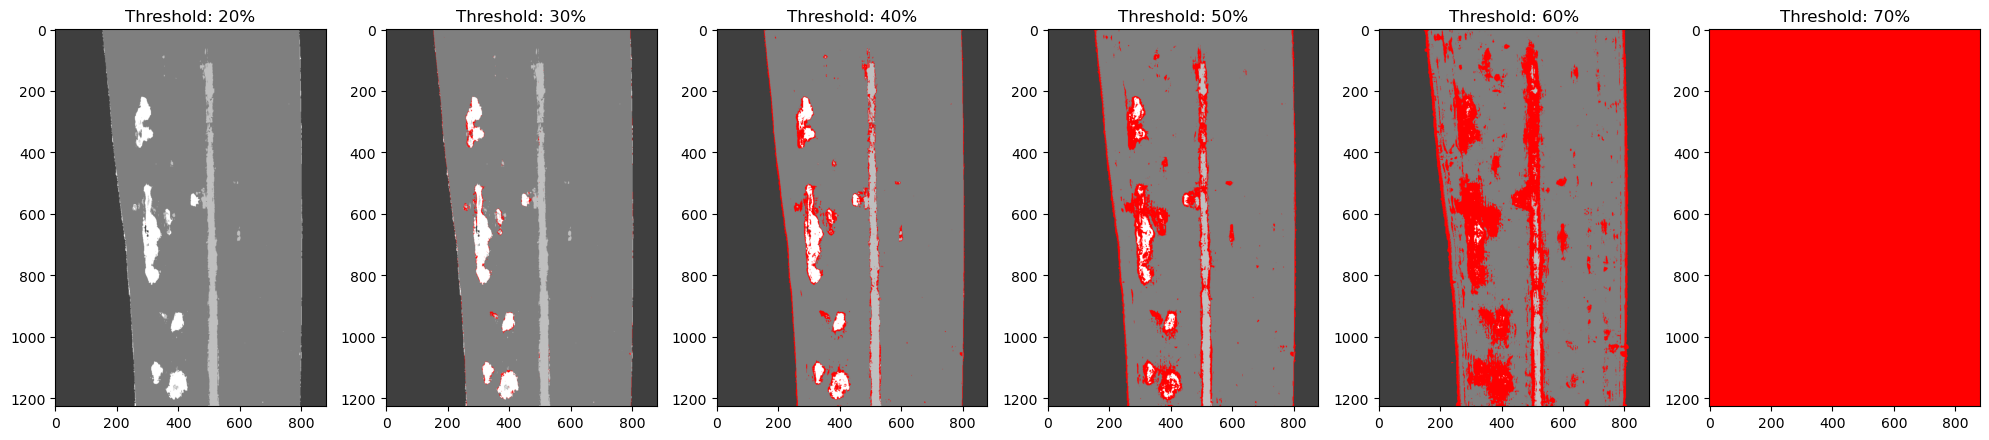

In [6]:
# run ilastik with probabilities on the image you want to see the uncertainty
run_ilastik(input_path = "./images/test/2.jpg",
            project_path = "model.ilp",
            result_base_path = "./model_result_h5/",
            export_source="Probabilities",
            output_format="hdf5")

# define the path to the probabilities file
file_path = "./model_result_h5/2_Probabilities.h5"

# define the tresholds you want to visualize
thresholds = [20, 30, 40, 50, 60, 70]

# define the color for the pixels below the threshold
below_threshold_color = [255, 0, 0]

# define the colors for the different channels
channel_colors = [[63, 63, 63], [127, 127, 127], [191, 191, 191], [255, 255, 255]]



fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(20, 20))
axes = axes.flatten()

for i, threshold in enumerate(thresholds):
    color_image = color_treshold_probabilities(file_path, threshold, below_threshold_color, channel_colors)
    color_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB)
    axes[i].imshow(color_image)
    axes[i].set_title(f'Threshold: {threshold}%')

plt.tight_layout()
plt.show()

---
## 4. Run Ilastik by thresholding uncertainty.
Here, you can use Ilastik as in the [Segment images](#2.-segment-images) section, but choose to threshold the result that you consider acceptable and replace uncertain pixels with the color of your choice.

In [7]:
# define the path to the input folder containing the images to be segmented
input_path = "./images/test"

# define the path to the ilastik project file you want to use
project_path = "model.ilp"

# define the path to the folder where the results should be saved
result_base_path = "./model_results_probabilities/"

# define the threshold for the probabilities
threshold = 50

# define the color for the pixels below the threshold
below_threshold_color = [255, 0, 0]

# define the colors for the different channels
channel_colors = [[63, 63, 63], [127, 127, 127], [191, 191, 191], [255, 255, 255]]

run_ilastik_probabilities(input_path = input_path,
                          project_path = project_path,
                          result_base_path = result_base_path,
                          threshold = threshold,
                          below_threshold_color = below_threshold_color,
                          channel_colors = channel_colors)

INFO ilastik.app: Using tiktorch executable: ['/Applications/ilastik-1.4.1b15-arm64-OSX.app/Contents/ilastik-release/bin/python', '-m', 'tiktorch.server']
INFO ilastik.app: config file location: <none>
INFO ilastik.app: Starting ilastik from "/Applications/ilastik-1.4.1b15-arm64-OSX.app/Contents/ilastik-release/lib/python3.9".
Starting ilastik from "/Applications/ilastik-1.4.1b15-arm64-OSX.app/Contents/ilastik-release/lib/python3.9".


WARNING 2024-04-23 22:21:29,951 opConservationTracking 47362 8211348160 Could not find any ILP solver
WARNING 2024-04-23 22:21:29,956 opStructuredTracking 47362 8211348160 Could not find any ILP solver
WARNING 2024-04-23 22:21:29,959 structuredTrackingWorkflow 47362 8211348160 Could not find any learning solver. Tracking will use flow-based solver (DPCT). Learning for tracking will be disabled!


INFO ilastik.shell.projectManager: Opening Project: model.ilp
INFO ilastik.workflows.pixelClassification.pixelClassificationWorkflow: Beginning Batch Processing
INFO ilastik.applets.dataSelection.dataSelectionApplet: Using axistags from previous lane: [y x c, None]
INFO ilastik.applets.batchProcessing.batchProcessingApplet: Exporting to /Users/titouanlegourrierec/Desktop/Github/EasIlastik/Examples/model_results_probabilities/4_Probabilities.h5/exported_data
INFO lazyflow.operators.ioOperators.ioOperators.OpH5N5WriterBigDataset: Data shape: (1049, 868, 4)
INFO lazyflow.utility.bigRequestStreamer: Estimated RAM usage per pixel is 224.0B * safety factor (2.0)
INFO lazyflow.utility.bigRequestStreamer: determining blockshape assuming available_ram is 9.7GiB, split between 8 threads
INFO lazyflow.utility.bigRequestStreamer: Chose blockshape: (1049, 868, 4)
INFO lazyflow.utility.bigRequestStreamer: Estimated RAM usage per block is 389.0MiB
DEBUG lazyflow.operators.classifierOperators: Feature

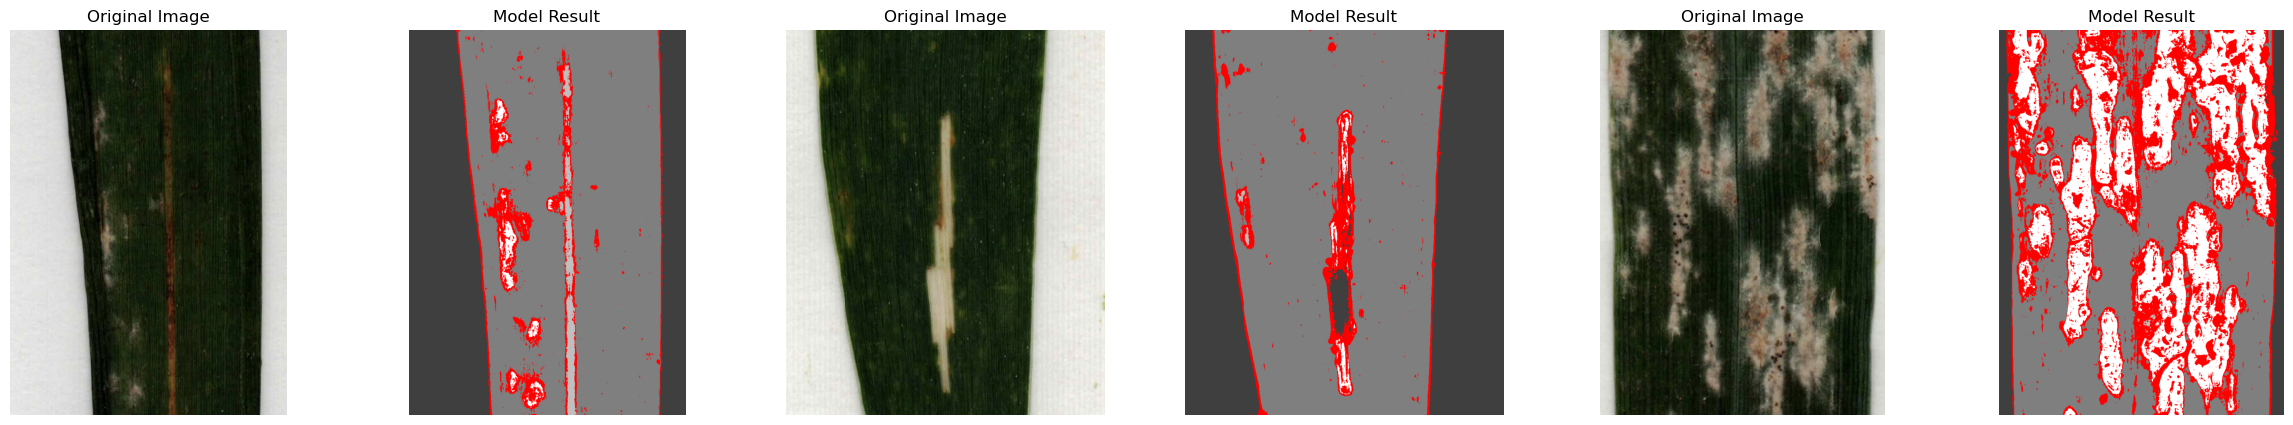

In [8]:
# display the original images and the model results
test_images = os.listdir("./images/test/")
model_results = os.listdir("./model_results_probabilities/")

test_images.sort()
model_results.sort()

total_images = len(test_images)

fig, axs = plt.subplots(1, total_images*2, figsize=(total_images*10, 5))

for i, (test_image, model_result) in enumerate(zip(test_images, model_results)):
    img = cv2.imread(f"./images/test/{test_image}")
    model_img = cv2.imread(f"./model_results_probabilities/{model_result}")

    axs[2*i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axs[2*i].set_title("Original Image")
    axs[2*i].axis("off")

    axs[2*i+1].imshow(cv2.cvtColor(model_img, cv2.COLOR_BGR2RGB))
    axs[2*i+1].set_title("Model Result")
    axs[2*i+1].axis("off")

plt.show()